<h1 style="color: #0000FF">PREMIERE PROJECT : Predicting Survival of Tongue Cancer Patients</h1>


Team Python
© 2023 Hamoye Data Science Internship

---

I, **Oladimeji WILLIAMS**, confirm - by submitting this document - that the solutions in this notebook are a result of my team's work (team Python), and that I abide by the [Code of Conduct](https://drive.google.com/file/d/1sbR80aowp1daCnElwx3kNm0fxids0e6b/view) contained therein.

### Overview: Predicting Survival of Tongue Cancer Patients
> The [repository](https://zenodo.org/record/7450476/files/tongue.csv?download=1) contains the dataset used in the paper **Predicting Survival of Tongue Cancer Patients by Machine Learning Models**. The dataset contains information on **1,712** tongue cancer curative surgery recipients. Each row represents one patient. The meaning of each variable is summarized here:

**Attribute Information:**
1. `id`: patient identifier
2. `gender`: patient sex
3. `survival`: patient survival status at follow-up; 0: survival, 1: death
4. `follow_time`: length of follow-up period in days
5. `part`: site of operation
6. `stage`: tumor stage; 0: very small, no spreading, 1: small, no spreading, 2: some growth, spreading, 3: large, spreading to surrounding tissue or lymph nodes, 4A/4B/4C: larger, metastasis to at least one other organ
7. `op`: operation status; 1: complete
8. `rt`: radiation therapy status; 0: not received, 1: received
9. `ct`: chemotherapy status; 0: not received, 1: received
10. `t_stage`: tumor size; 1 (small) to 4 (large)
11. `n_stage`: metastasis to lymph nodes; 0 (no metastasis) to 3 (metastasis to multiple lymph nodes)
12. `grade`: tumor grade; 1 (no proliferation) to 3 (aggressive proliferation)


- **The supporting visualization of this project is on [Power BI](https://app.powerbi.com/view?r=eyJrIjoiNDJiYjVlYzQtM2QyNS00ZTE5LTg4MDMtOGM3ZWEyMzlmZTZjIiwidCI6IjU0NjJmMDc4LWFiYTgtNDE1OS05MWYwLWVhODg1MmJjOTU4NCJ9).**
- **The supporting presentation deck is hosted on [Canva](https://www.canva.com/design/DAFJ9cXZSTM/w4seT4KLSbzOLsHxh3VfKg/view?utm_content=DAFJ9cXZSTM&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton).**
- **The report on this ingenius project is hosted on [Google Docs](https://www.canva.com/design/DAFJ9cXZSTM/w4seT4KLSbzOLsHxh3VfKg/view?utm_content=DAFJ9cXZSTM&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton).**
- **This code is hosted on [GitHub](https://www.canva.com/design/DAFJ9cXZSTM/w4seT4KLSbzOLsHxh3VfKg/view?utm_content=DAFJ9cXZSTM&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton).**


<img src="https://1000logos.net/wp-content/uploads/2022/04/Breast-Cancer-Logo-500x281.png" alt="Cancer Symbol" width="500" height="280">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/1869px-Python-logo-notext.svg.png" alt="Python Symbol" width="280" height="280">


<h1 style="color: #0000FF">Problem Statement</h1>

> Tongue cancer is a prevalent form of malignancy that affects the oral cavity, originating in the mouth and throat. The diagnosis, treatment, and management of this disease have been areas of active research and development. Current approaches to treatment typically involve surgical removal, chemotherapy, and radiation therapy, which have been the primary modalities used to address tongue cancer. The effectiveness of these treatments is closely associated with patients' survival outcomes. Traditional studies have relied on descriptive statistics to identify survival and risk factors, potentially overlooking complex and nonlinear relationships among clinical and demographic variables.
>
> The comprehensive problem at hand is to develop a data-driven approach utilizing cutting-edge machine learning models and clinical data to accurately predict the survival of tongue cancer patients following treatment. By leveraging advanced techniques, we aim to address the limitations of traditional statistical approaches and enhance our ability to estimate patients' survival status.
>
> Specifically, our objectives include:
>
> 1. Building a robust predictive model that incorporates a wide range of clinical and demographic variables to capture the complexity of tongue cancer and its impact on survival outcomes.
> 2. Applying rigorous evaluation methods, such as five-fold cross-validation, bootstrap analysis, and permutation feature importance, to estimate the performance of the predictive model and ensure its reliability.
> 3. Comparing the performance of different machine learning models and identifying the most accurate and interpretable approach for survival prediction in tongue cancer.
> 4. Interpreting the model results and identifying the significant prognostic factors associated with survival in tongue cancer patients, providing valuable insights for clinicians and researchers.
> 5. Validating the model's findings by comparing them with previous clinical studies to assess the consistency and reliability of our data-driven approach.
>
> The successful accomplishment of these objectives will contribute to improved tongue cancer treatment and management by providing clinicians with a reliable, accurate, and interpretable tool for predicting patients' survival outcomes. This data-driven approach can serve as additional evidence to support clinical decision-making, enhance personalized treatment strategies, and ultimately improve patient care and outcomes in the context of tongue cancer.

<h5 style="color: red">Install Additional Libraries</h5>

In [1]:
# Install necessary modules
# !pip install powerbiclient
!pip install lazypredict
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h5 style="color: red">Import All Neccessary Libraries</h5>

In [2]:
# Load All Possible Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
# from powerbiclient import Report, models
# from powerbiclient.authentication import DeviceCodeLoginAuthentication
import random
import pickle as pk
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, RidgeClassifierCV, Perceptron
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [3]:
#Load dataset
df = pd.read_csv('tongue.csv')

In [4]:
#Copy the dataset from one variable to another variable
df_copy = df.copy()

In [5]:
# #Renaming the column
# df = df.rename(columns = {"op": "operation_status", "rt": "radiation_therapy", "ct": "chemotherapy_status"})

In [6]:
df.head()

,Unnamed: 0,id,gender,age,survival,follow_time,part,stage,op,rt,ct,t_stage,n_stage,grade
0,1,1,M,50,1,1504,tongue,2,1,0,0,2,0,1
1,2,2,M,57,1,2011,tongue,1,1,0,0,1,0,1
2,3,3,M,53,0,341,tongue,2,1,0,0,2,0,2
3,4,4,M,49,1,508,tongue,1,1,0,0,1,0,2
4,5,5,M,75,0,992,tongue,4,1,1,0,2,2,3


<h1 style="color: #0000FF">Check Unique Values In Each Column</h1>

In [7]:
df['gender'].nunique()

2

In [8]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [9]:
df['part'].nunique()

1

In [10]:
df['survival'].nunique()

2

In [11]:
df['survival'].unique()

array([1, 0])

In [12]:
df['stage'].nunique()

4

In [13]:
df['stage'].unique()

array([2, 1, 4, 3])

In [14]:
df['op'].nunique()

1

In [15]:
df['rt'].nunique()

2

In [16]:
df['rt'].unique()

array([0, 1])

In [17]:
df['ct'].nunique()

2

In [18]:
df['ct'].unique()

array([0, 1])

In [19]:
df['t_stage'].nunique()

4

In [20]:
df['t_stage'].unique()

array([2, 1, 3, 4])

In [21]:
df['n_stage'].nunique()

4

In [22]:
df['n_stage'].unique()

array([0, 2, 1, 3])

In [23]:
df['grade'].nunique()

3

In [24]:
df['grade'].unique()

array([1, 2, 3])

In [25]:
# Drop Unuseful columns
df = df.drop(columns=["Unnamed: 0", "id", "part"], axis=0)

In [26]:
df.head()

,gender,age,survival,follow_time,stage,op,rt,ct,t_stage,n_stage,grade
0,M,50,1,1504,2,1,0,0,2,0,1
1,M,57,1,2011,1,1,0,0,1,0,1
2,M,53,0,341,2,1,0,0,2,0,2
3,M,49,1,508,1,1,0,0,1,0,2
4,M,75,0,992,4,1,1,0,2,2,3


<h1 style="color: #0000FF">Bivariate and Multivariate Relationships</h1>

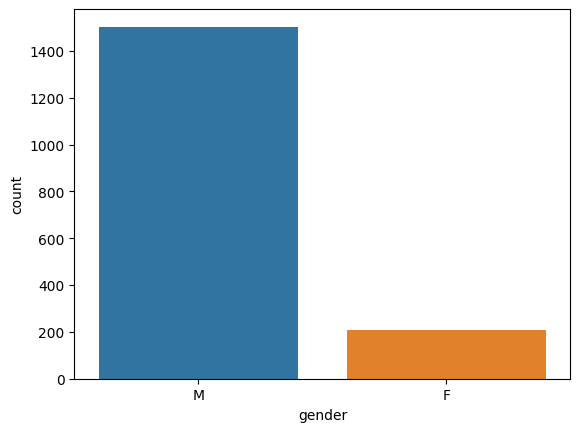

In [27]:
sns.countplot(data=df, x='gender')
plt.show()

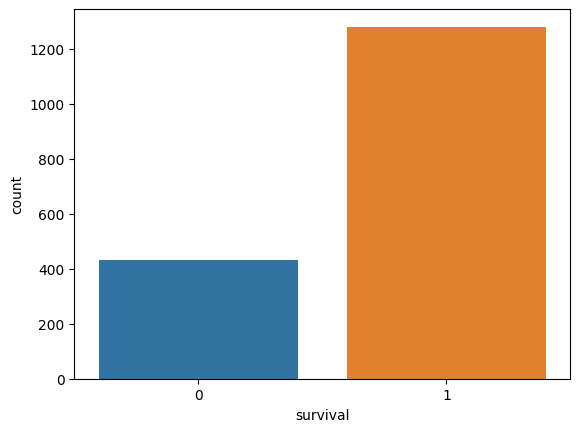

In [28]:
sns.countplot(data=df, x='survival')
plt.show()

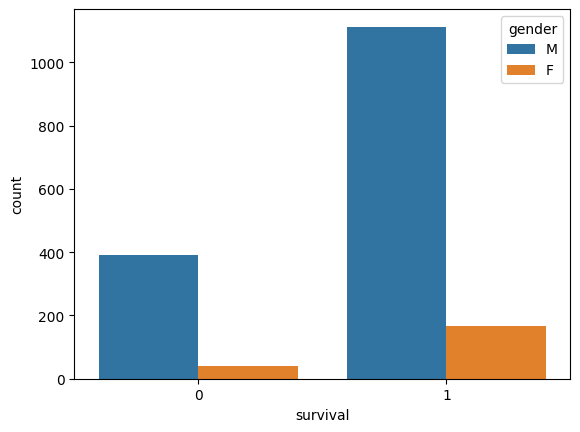

In [29]:
sns.countplot(data=df, x='survival', hue='gender')
plt.show()

Text(0, 0.5, 'percentage')

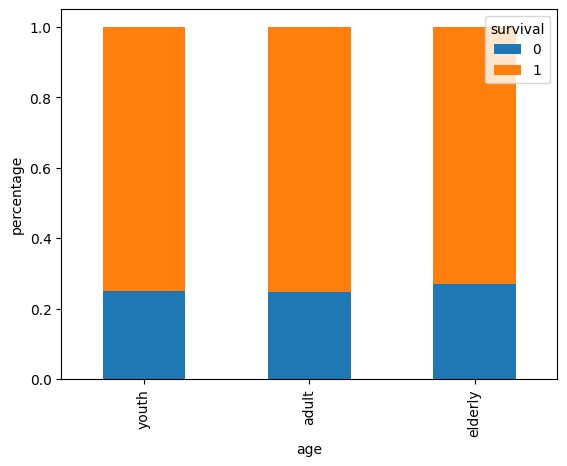

In [30]:
bins = [0, 30, 60, 100]
groups = ['youth', 'adult', 'elderly']
df['age_bin'] = pd.cut(df['age'], bins, labels=groups)
age_bin = pd.crosstab(df['age_bin'],df['survival'])
age_bin.div(age_bin.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked='True')
plt.xlabel('age')
plt.ylabel('percentage')

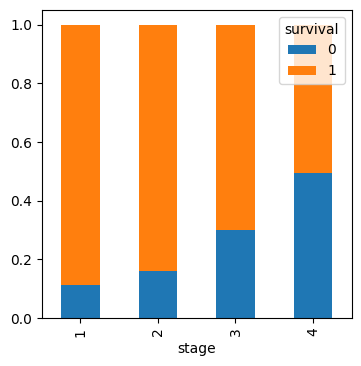

In [31]:
stage = pd.crosstab(df['stage'],df['survival'])
stage.div(stage.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

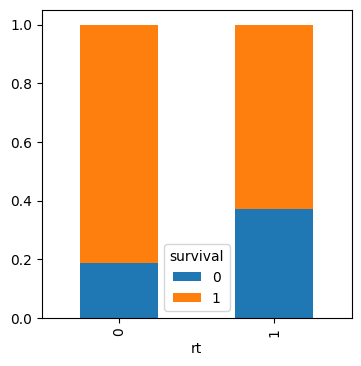

In [32]:
rt = pd.crosstab(df['rt'],df['survival'])
rt.div(rt.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

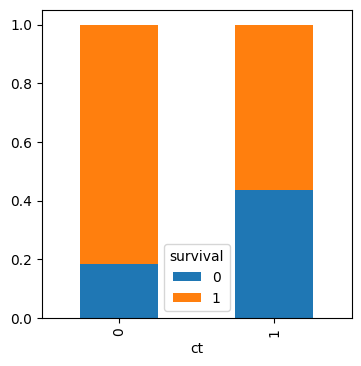

In [33]:
ct = pd.crosstab(df['ct'],df['survival'])
ct.div(ct.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

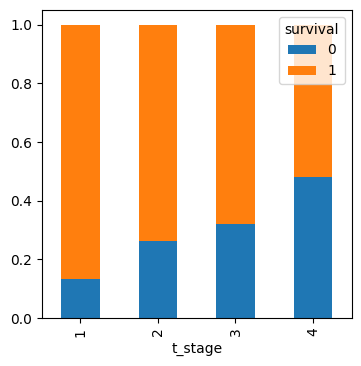

In [34]:
t_stage = pd.crosstab(df['t_stage'],df['survival'])
t_stage.div(t_stage.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

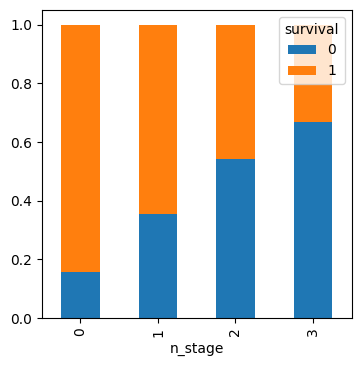

In [35]:
n_stage = pd.crosstab(df['n_stage'],df['survival'])
n_stage.div(n_stage.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

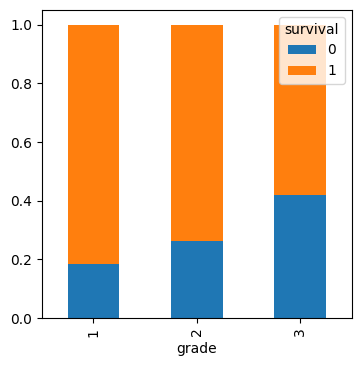

In [36]:
grade = pd.crosstab(df['grade'],df['survival'])
grade.div(grade.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

<h1 style="color: #0000FF">Further Visualizations on Power BI</h1>

<h5 style="color: red">Unfortunately, we need a pro account to use this `powerbiclient` service</h5>

`auth = DeviceCodeLoginAuthentication()`

- `group_id = "19f7a701-498e-4397-aa25-e512c2238614"`
- `report_id = "cad908fa-c163-48e3-a1cb-b363864d9220"`

- `report = Report(group_id = group_id, report_id = report_id, auth = device_auth)`
- `report`

<h1 style="color: #0000FF">Further Processing for Machine Learning</h1>

In [37]:
# Encode `gender` column
encoding = {"M": 0, "F": 1}
df['gender'] = df['gender'].map(encoding)

<h1 style="color: #0000FF">Feature Selection</h1>

In [38]:
# Separate Features from Label
X = df[['gender', 'age', 'grade', 'follow_time', 'stage', 'op', 'rt', 'ct',
       't_stage', 'n_stage', 'grade']]
y = df["survival"]

In [39]:
# Select top 7 important features
selector = SelectKBest(mutual_info_classif, k=7)
x_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Get the names of the selected features
feature_names = X.columns[selected_features]

# Print the names of the selected features
print(feature_names)

Index(['grade', 'follow_time', 'stage', 'rt', 'ct', 't_stage', 'n_stage'], dtype='object')


In [40]:
# Check the most important features using the `f_score`
f_scores, p_values = f_classif(X, y)
f_scores_df = pd.DataFrame({'Feature_Name': X.columns, 'f_score': f_scores, 'p_value': p_values})
f_scores_df.sort_values(by='f_score', ascending=False, inplace=True)
print(f_scores_df)

   Feature_Name  f_score  p_value
3   follow_time   551.95     0.00
9       n_stage   245.75     0.00
4         stage   244.97     0.00
8       t_stage   135.96     0.00
7            ct   125.30     0.00
6            rt    73.97     0.00
2         grade    35.47     0.00
10        grade    35.47     0.00
0        gender     3.83     0.05
1           age     2.66     0.10
5            op      NaN      NaN


In [41]:
# Check the most important features using the `chi-square`
chi_scores, p_values = chi2(X,y)
results = pd.DataFrame({'Feature_Name': X.columns,'chi-square':chi_scores,'p-value': p_values})
results.sort_values(by='chi-square', ascending=False, inplace=True)
print(results)

   Feature_Name  chi-square  p-value
3   follow_time   174450.28     0.00
9       n_stage      280.68     0.00
4         stage      136.06     0.00
7            ct       84.86     0.00
8       t_stage       68.89     0.00
6            rt       45.61     0.00
2         grade        6.87     0.01
10        grade        6.87     0.01
1           age        6.53     0.01
0        gender        3.36     0.07
5            op        0.00     1.00


In [42]:
p_values_df = pd.Series(p_values, index = X.columns)
p_values_df.sort_values(ascending = False, inplace = True)

In [43]:
p_values_df

op            1.00
gender        0.07
age           0.01
grade         0.01
grade         0.01
rt            0.00
t_stage       0.00
ct            0.00
stage         0.00
n_stage       0.00
follow_time   0.00
dtype: float64

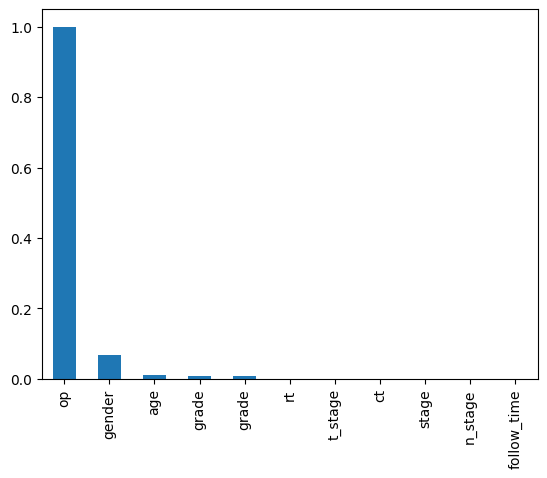

In [44]:
# Print the bar chart of the p-values
p_values_df.plot.bar()
plt.show()

<h5 style="color: red">The higher the bars, the less likely the feature contributes to the label</h5>

<h5 style="color: red">`op` and `gender` are subsequently deselected</h5>

In [45]:
X = df[['age', 'grade', 'rt', 't_stage', 'ct', 'stage', 'n_stage', 'follow_time']]
y = df["survival"]

<h3 style="color: red">Check for Multicollinearity Using Variance Inflation Factor (VIF)</h3>

We used the following rules of thumb for interpreting `VIF` values:

- `VIF = 1`: There is no correlation between a given predictor variable and any other predictor variables in the model.
- `VIF between 1 and 5`: There is moderate correlation between a given predictor variable and other predictor variables in the model.
- `VIF > 5`: There is severe correlation between a given predictor variable and other predictor variables in the model.

In [46]:
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

In [47]:
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [48]:
vif_df.sort_values(by='VIF', ascending = False)

,feature,VIF
5,stage,38.67
3,t_stage,19.94
0,age,11.09
1,grade,8.15
6,n_stage,4.88
7,follow_time,3.41
4,ct,3.19
2,rt,3.06


<h5 style="color: red">We deselect `stage`</h5>

In [49]:
# Feature selection
X = df[['age', 'grade', 'rt', 't_stage', 'ct', 'n_stage', 'follow_time']]
y = df["survival"]

In [50]:
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

In [51]:
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [52]:
vif_df.sort_values(by='VIF', ascending = False)

,feature,VIF
0,age,10.27
1,grade,8.11
3,t_stage,6.15
6,follow_time,3.40
4,ct,3.19
2,rt,2.89
5,n_stage,2.66


<h5 style="color: red">We deselect `age`</h5>

In [53]:
# Feature selection
X = df[['grade', 'rt', 't_stage', 'ct', 'n_stage', 'follow_time']]
y = df["survival"]

In [54]:
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

In [55]:
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [56]:
vif_df.sort_values(by='VIF', ascending = False)

,feature,VIF
2,t_stage,5.37
0,grade,4.87
3,ct,3.17
5,follow_time,2.88
1,rt,2.88
4,n_stage,2.66


<h5 style="color: red">So our acceptable features are `t_stage`, `grade`, `rt`, `ct`, `n_stage`, `follow_time`</h5>

In [57]:
# Final Features
X = df[['t_stage', 'grade', 'rt', 'ct', 'n_stage', 'follow_time']]
y = df["survival"]

In [58]:
# evaluating functions
def evaluate_models1(x_train, y_train, x_val, y_val):
    random_seed= 0
    scores = []
    for i in range(len(models) - 1):
        model = models[i +1]
        model.fit(X_train, y_train)
        y_predicted = model.predict(x_val)
        accuracy = accuracy_score(y_val, y_predicted)
        f1score = f1_score(y_val, y_predicted, average = 'weighted')
        precision = precision_score(y_val, y_predicted, average = 'weighted')
        recall = recall_score(y_val, y_predicted, average = 'weighted')
        roc_auc = roc_auc_score(y_val, y_predicted)
        scores.append({
            'model':names[i],
            'model_score':model.score(x_train, y_train),
            'accuracy' : accuracy,
            'f1_score' : f1score,
            'precision': precision,
            'recall' : recall,
            'roc_auc': roc_auc
        })
    return pd.DataFrame(scores, columns=['model','model_score','accuracy','f1_score', 'precision', 'recall', 'roc_auc'])

In [59]:
# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=0)

In [60]:
df.head()

,gender,age,survival,follow_time,stage,op,rt,ct,t_stage,n_stage,grade,age_bin
0,0,50,1,1504,2,1,0,0,2,0,1,adult
1,0,57,1,2011,1,1,0,0,1,0,1,adult
2,0,53,0,341,2,1,0,0,2,0,2,adult
3,0,49,1,508,1,1,0,0,1,0,2,adult
4,0,75,0,992,4,1,1,0,2,2,3,elderly


In [61]:
df.groupby('survival')['gender'].value_counts()

survival  gender
0         0          391
          1           41
1         0         1113
          1          167
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

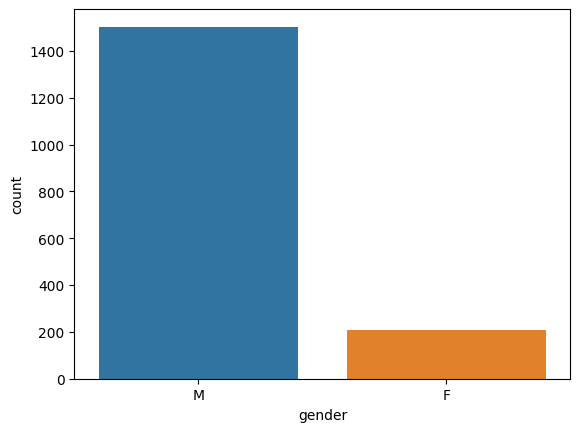

In [62]:
sns.countplot(data=df_copy, x='gender')

In [63]:
df_copy

,Unnamed: 0,id,gender,age,survival,follow_time,part,stage,op,rt,ct,t_stage,n_stage,grade
0,1,1,M,50,1,1504,tongue,2,1,0,0,2,0,1
1,2,2,M,57,1,2011,tongue,1,1,0,0,1,0,1
2,3,3,M,53,0,341,tongue,2,1,0,0,2,0,2
3,4,4,M,49,1,508,tongue,1,1,0,0,1,0,2
4,5,5,M,75,0,992,tongue,4,1,1,0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,1708,1708,M,46,1,730,tongue,1,1,0,0,1,0,2
1708,1709,1709,M,59,1,473,tongue,1,1,0,0,1,0,1
1709,1710,1710,M,47,1,968,tongue,1,1,0,0,1,0,2
1710,1711,1711,M,63,1,450,tongue,2,1,0,0,2,0,2


In [64]:
df['gender']

0       0
1       0
2       0
3       0
4       0
       ..
1707    0
1708    0
1709    0
1710    0
1711    0
Name: gender, Length: 1712, dtype: int64

<h1 style="color: #0000FF">Use a Lazy Classifier to Glance the High Performing Models</h1>

In [65]:
classifier = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, predictions=True)
models, predictions = classifier.fit(X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [00:02<00:00, 13.26it/s]


In [66]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.85,0.75,0.75,0.84,0.27
AdaBoostClassifier,0.85,0.75,0.75,0.84,0.16
XGBClassifier,0.84,0.74,0.74,0.83,0.30
SGDClassifier,0.84,0.74,0.74,0.83,0.02
RandomForestClassifier,0.83,0.74,0.74,0.83,0.29
QuadraticDiscriminantAnalysis,0.82,0.74,0.74,0.82,0.02
BaggingClassifier,0.82,0.73,0.73,0.81,0.05
LogisticRegression,0.84,0.72,0.72,0.83,0.03
ExtraTreesClassifier,0.80,0.71,0.71,0.80,0.24


In [67]:
models.index

Index(['LGBMClassifier', 'AdaBoostClassifier', 'XGBClassifier',
       'SGDClassifier', 'RandomForestClassifier',
       'QuadraticDiscriminantAnalysis', 'BaggingClassifier',
       'LogisticRegression', 'ExtraTreesClassifier', 'LinearSVC',
       'DecisionTreeClassifier', 'PassiveAggressiveClassifier',
       'CalibratedClassifierCV', 'ExtraTreeClassifier', 'LabelPropagation',
       'LabelSpreading', 'SVC', 'KNeighborsClassifier',
       'LinearDiscriminantAnalysis', 'NearestCentroid', 'GaussianNB',
       'RidgeClassifier', 'RidgeClassifierCV', 'BernoulliNB', 'NuSVC',
       'Perceptron', 'DummyClassifier'],
      dtype='object', name='Model')

In [68]:
# Sort the result by the performance metric of interest - `F1 Score`
models["F1 Score"].sort_values(ascending = False)

Model
AdaBoostClassifier              0.84
LGBMClassifier                  0.84
SGDClassifier                   0.83
XGBClassifier                   0.83
LogisticRegression              0.83
RandomForestClassifier          0.83
QuadraticDiscriminantAnalysis   0.82
LinearSVC                       0.81
BaggingClassifier               0.81
CalibratedClassifierCV          0.81
PassiveAggressiveClassifier     0.81
SVC                             0.80
LinearDiscriminantAnalysis      0.80
KNeighborsClassifier            0.80
ExtraTreesClassifier            0.80
LabelPropagation                0.79
LabelSpreading                  0.79
DecisionTreeClassifier          0.79
ExtraTreeClassifier             0.78
RidgeClassifier                 0.78
RidgeClassifierCV               0.78
NuSVC                           0.76
GaussianNB                      0.75
BernoulliNB                     0.74
NearestCentroid                 0.74
Perceptron                      0.73
DummyClassifier                 

In [69]:
# Instantiate the model objects
ada_boost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
lgbm_classifier = LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.1, n_estimators=100, objective='binary', random_state=42)
sgd_classifier = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, learning_rate='optimal')
xgb_classifier = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
logistic_regression = LogisticRegression(C=1.0, solver='lbfgs')
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
qda = QuadraticDiscriminantAnalysis(reg_param=0.5)
bagging_classifier = BaggingClassifier(n_estimators=50, random_state=42)
k_neighbors_classifier = KNeighborsClassifier(n_neighbors=5)
svc = SVC(C=1.0, kernel='rbf', gamma='scale')
label_propagation_model = LabelPropagation(kernel='knn', n_neighbors=3)
label_spreading = LabelSpreading(kernel='knn', n_neighbors=5, alpha=0.8)
cat_boost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

In [70]:
models = [ada_boost_classifier, bagging_classifier, cat_boost_classifier, qda, k_neighbors_classifier,
          logistic_regression, lgbm_classifier, random_forest_classifier, sgd_classifier, svc,
          xgb_classifier, label_propagation_model, label_spreading]

names = ['AdaBoostClassifier', 'BaggingClassifier', 'CatBoostClassifier', 'QuadraticDiscriminantAnalysis',
         'KNeighborsClassifier', 'LogisticRegression', 'LGBMClassifier', 'RandomForestClassifier',
         'SGDClassifier', 'SVC', 'XGBClassifier', 'LabelPropagation', 'LabelSpreading']

In [71]:
#Evaluate the performance of the models
result = evaluate_models1(X_train, y_train, X_val, y_val)

0:	learn: 0.6504123	total: 49.1ms	remaining: 4.86s
1:	learn: 0.6119921	total: 50.8ms	remaining: 2.49s
2:	learn: 0.5786973	total: 51.6ms	remaining: 1.67s
3:	learn: 0.5520275	total: 52.1ms	remaining: 1.25s
4:	learn: 0.5279210	total: 53.4ms	remaining: 1.01s
5:	learn: 0.5055943	total: 54.8ms	remaining: 859ms
6:	learn: 0.4861467	total: 56.3ms	remaining: 748ms
7:	learn: 0.4698648	total: 57.9ms	remaining: 666ms
8:	learn: 0.4560369	total: 59.6ms	remaining: 602ms
9:	learn: 0.4444069	total: 61.2ms	remaining: 551ms
10:	learn: 0.4327434	total: 63ms	remaining: 510ms
11:	learn: 0.4231990	total: 64.3ms	remaining: 471ms
12:	learn: 0.4147691	total: 65.5ms	remaining: 439ms
13:	learn: 0.4070342	total: 67.1ms	remaining: 412ms
14:	learn: 0.3997896	total: 69ms	remaining: 391ms
15:	learn: 0.3934041	total: 70.9ms	remaining: 372ms
16:	learn: 0.3883936	total: 72.5ms	remaining: 354ms
17:	learn: 0.3841684	total: 73.9ms	remaining: 337ms
18:	learn: 0.3802971	total: 75.3ms	remaining: 321ms
19:	learn: 0.3765098	total

In [72]:
result['model']

0                AdaBoostClassifier
1                 BaggingClassifier
2                CatBoostClassifier
3     QuadraticDiscriminantAnalysis
4              KNeighborsClassifier
5                LogisticRegression
6                    LGBMClassifier
7            RandomForestClassifier
8                     SGDClassifier
9                               SVC
10                    XGBClassifier
11                 LabelPropagation
Name: model, dtype: object

In [73]:
# Sort the result by the performance metric of interest `f1-score`
result.sort_values(by="f1_score", ascending = False)

,model,model_score,accuracy,f1_score,precision,recall,roc_auc
9,SVC,0.88,0.87,0.85,0.87,0.87,0.75
1,BaggingClassifier,0.88,0.86,0.85,0.86,0.86,0.76
8,SGDClassifier,0.84,0.86,0.85,0.85,0.86,0.75
6,LGBMClassifier,0.87,0.86,0.85,0.86,0.86,0.74
11,LabelPropagation,0.85,0.85,0.84,0.85,0.85,0.73
5,LogisticRegression,0.93,0.84,0.83,0.83,0.84,0.75
4,KNeighborsClassifier,0.85,0.85,0.83,0.84,0.85,0.73
3,QuadraticDiscriminantAnalysis,0.86,0.84,0.83,0.84,0.84,0.73
2,CatBoostClassifier,0.83,0.83,0.83,0.83,0.83,0.77
10,XGBClassifier,0.88,0.82,0.81,0.81,0.82,0.71


<h1 style="color: #0000FF">Create an ensemble using VotingClassifier</h1>

<h4 style="color: #0000FF">Iterate Over Several Combinations and Evaluate the Performance</h4>

In [74]:
# Create an ensemble of `svc` and `bagging_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.76666667 0.8125     0.82083333 0.75732218 0.81171548]
Mean Score: 0.7938075313807531


In [75]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8190661478599222
Precision: 0.8791773778920309
Recall: 0.8814432989690721
F1 Score: 0.8803088803088803


In [76]:
# Create an ensemble of `svc`, `bagging_classifier`, and `sgd_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.82083333 0.85833333 0.8625     0.84518828 0.84937238]
Mean Score: 0.8472454672245467


In [77]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8463035019455253
Precision: 0.844097995545657
Recall: 0.9768041237113402
F1 Score: 0.9056152927120669


In [78]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, and `lgbm_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                              ('LGBMClassifier', lgbm_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.77916667 0.8        0.8375     0.77824268 0.81589958]
Mean Score: 0.8021617852161785


In [79]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8560311284046692
Precision: 0.8685446009389671
Recall: 0.9536082474226805
F1 Score: 0.9090909090909091


In [80]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `label_propagation_model`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                              ('LGBMClassifier', lgbm_classifier),
                                               ('LabelPropagation', label_propagation_model)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.8        0.85416667 0.85       0.81171548 0.85355649]
Mean Score: 0.8338877266387726


In [81]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8501945525291829
Precision: 0.8526077097505669
Recall: 0.9690721649484536
F1 Score: 0.9071170084439084


In [82]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `logistic_regression`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                              ('LGBMClassifier', lgbm_classifier),
                                              ('LogisticRegression', logistic_regression)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.825      0.8375     0.85416667 0.85355649 0.87029289]
Mean Score: 0.8481032078103208


In [83]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8560311284046692
Precision: 0.8536036036036037
Recall: 0.9768041237113402
F1 Score: 0.9110576923076923


In [84]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `logistic_regression`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                              ('LGBMClassifier', lgbm_classifier),
                                              ('LogisticRegression', logistic_regression),
                                              ('KNeighborsClassifier', k_neighbors_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.8125     0.81666667 0.85833333 0.84100418 0.84937238]
Mean Score: 0.8355753138075313


In [85]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8599221789883269
Precision: 0.8640552995391705
Recall: 0.9664948453608248
F1 Score: 0.9124087591240876


In [86]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('KNeighborsClassifier', k_neighbors_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.79583333 0.85       0.86666667 0.83263598 0.85355649]
Mean Score: 0.8397384937238493


In [87]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.857976653696498
Precision: 0.8571428571428571
Recall: 0.9742268041237113
F1 Score: 0.9119420989143546


In [88]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, `k_neighbors_classifier`, and `cat_boost_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('KNeighborsClassifier', k_neighbors_classifier),
                                               ('CatBoostClassifier', cat_boost_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 2.14ms	remaining: 212ms
1:	learn: 0.6129015	total: 3.7ms	remaining: 181ms
2:	learn: 0.5811213	total: 4.44ms	remaining: 144ms
3:	learn: 0.5506715	total: 5.04ms	remaining: 121ms
4:	learn: 0.5267948	total: 5.91ms	remaining: 112ms
5:	learn: 0.5048085	total: 7.16ms	remaining: 112ms
6:	learn: 0.4852532	total: 8.24ms	remaining: 109ms
7:	learn: 0.4692633	total: 9.2ms	remaining: 106ms
8:	learn: 0.4548821	total: 9.81ms	remaining: 99.2ms
9:	learn: 0.4410151	total: 10.9ms	remaining: 98ms
10:	learn: 0.4305726	total: 11.8ms	remaining: 95.2ms
11:	learn: 0.4215097	total: 12.4ms	remaining: 90.7ms
12:	learn: 0.4129459	total: 13.4ms	remaining: 89.6ms
13:	learn: 0.4051935	total: 14.4ms	remaining: 88.7ms
14:	learn: 0.3991648	total: 15.4ms	remaining: 87.5ms
15:	learn: 0.3933554	total: 16.5ms	remaining: 86.5ms
16:	learn: 0.3873205	total: 17.5ms	remaining: 85.4ms
17:	learn: 0.3825623	total: 18.5ms	remaining: 84.3ms
18:	learn: 0.3782678	total: 19.6ms	remaining: 83.6ms
19:	learn: 0.37

In [89]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 800us	remaining: 79.3ms
1:	learn: 0.6119921	total: 3.12ms	remaining: 153ms
2:	learn: 0.5786973	total: 4.18ms	remaining: 135ms
3:	learn: 0.5520275	total: 4.86ms	remaining: 117ms
4:	learn: 0.5279210	total: 5.8ms	remaining: 110ms
5:	learn: 0.5055943	total: 6.64ms	remaining: 104ms
6:	learn: 0.4861467	total: 7.71ms	remaining: 102ms
7:	learn: 0.4698648	total: 8.73ms	remaining: 100ms
8:	learn: 0.4560369	total: 9.69ms	remaining: 98ms
9:	learn: 0.4444069	total: 10.7ms	remaining: 96.5ms
10:	learn: 0.4327434	total: 11.8ms	remaining: 95.1ms
11:	learn: 0.4231990	total: 12.3ms	remaining: 90.5ms
12:	learn: 0.4147691	total: 13.5ms	remaining: 90ms
13:	learn: 0.4070342	total: 14.5ms	remaining: 89.2ms
14:	learn: 0.3997896	total: 15.5ms	remaining: 87.7ms
15:	learn: 0.3934041	total: 16.5ms	remaining: 86.7ms
16:	learn: 0.3883936	total: 17.5ms	remaining: 85.2ms
17:	learn: 0.3841684	total: 18.3ms	remaining: 83.3ms
18:	learn: 0.3802971	total: 19.3ms	remaining: 82.2ms
19:	learn: 0.376

In [90]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, `k_neighbors_classifier`, and `cat_boost_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('LogisticRegression', logistic_regression),
                                               ('CatBoostClassifier', cat_boost_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 843us	remaining: 83.5ms
1:	learn: 0.6129015	total: 3.02ms	remaining: 148ms
2:	learn: 0.5811213	total: 4.03ms	remaining: 130ms
3:	learn: 0.5506715	total: 4.72ms	remaining: 113ms
4:	learn: 0.5267948	total: 5.74ms	remaining: 109ms
5:	learn: 0.5048085	total: 6.79ms	remaining: 106ms
6:	learn: 0.4852532	total: 7.87ms	remaining: 105ms
7:	learn: 0.4692633	total: 8.87ms	remaining: 102ms
8:	learn: 0.4548821	total: 9.48ms	remaining: 95.9ms
9:	learn: 0.4410151	total: 10.3ms	remaining: 92.4ms
10:	learn: 0.4305726	total: 10.8ms	remaining: 87.7ms
11:	learn: 0.4215097	total: 11.3ms	remaining: 82.9ms
12:	learn: 0.4129459	total: 12.1ms	remaining: 81.1ms
13:	learn: 0.4051935	total: 14.5ms	remaining: 88.9ms
14:	learn: 0.3991648	total: 15.4ms	remaining: 87ms
15:	learn: 0.3933554	total: 16.7ms	remaining: 87.9ms
16:	learn: 0.3873205	total: 17.7ms	remaining: 86.6ms
17:	learn: 0.3825623	total: 19.5ms	remaining: 88.7ms
18:	learn: 0.3782678	total: 21.2ms	remaining: 90.3ms
19:	learn: 0.

In [91]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 895us	remaining: 88.7ms
1:	learn: 0.6119921	total: 1.71ms	remaining: 84ms
2:	learn: 0.5786973	total: 2.54ms	remaining: 82.1ms
3:	learn: 0.5520275	total: 3ms	remaining: 72ms
4:	learn: 0.5279210	total: 3.83ms	remaining: 72.8ms
5:	learn: 0.5055943	total: 4.41ms	remaining: 69.2ms
6:	learn: 0.4861467	total: 5.24ms	remaining: 69.6ms
7:	learn: 0.4698648	total: 6.06ms	remaining: 69.7ms
8:	learn: 0.4560369	total: 6.87ms	remaining: 69.5ms
9:	learn: 0.4444069	total: 7.7ms	remaining: 69.3ms
10:	learn: 0.4327434	total: 8.49ms	remaining: 68.7ms
11:	learn: 0.4231990	total: 8.88ms	remaining: 65.2ms
12:	learn: 0.4147691	total: 9.65ms	remaining: 64.6ms
13:	learn: 0.4070342	total: 10.4ms	remaining: 64ms
14:	learn: 0.3997896	total: 11.1ms	remaining: 63.1ms
15:	learn: 0.3934041	total: 11.9ms	remaining: 62.2ms
16:	learn: 0.3883936	total: 12.6ms	remaining: 61.7ms
17:	learn: 0.3841684	total: 13.2ms	remaining: 60.2ms
18:	learn: 0.3802971	total: 14ms	remaining: 59.6ms
19:	learn: 0.376

In [92]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                              ('LGBMClassifier', lgbm_classifier),
                                              ('CatBoostClassifier', cat_boost_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 745us	remaining: 73.8ms
1:	learn: 0.6129015	total: 4.49ms	remaining: 220ms
2:	learn: 0.5811213	total: 5.42ms	remaining: 175ms
3:	learn: 0.5506715	total: 6.16ms	remaining: 148ms
4:	learn: 0.5267948	total: 7.21ms	remaining: 137ms
5:	learn: 0.5048085	total: 8.24ms	remaining: 129ms
6:	learn: 0.4852532	total: 9.5ms	remaining: 126ms
7:	learn: 0.4692633	total: 12.6ms	remaining: 145ms
8:	learn: 0.4548821	total: 12.9ms	remaining: 131ms
9:	learn: 0.4410151	total: 14.3ms	remaining: 129ms
10:	learn: 0.4305726	total: 15.1ms	remaining: 122ms
11:	learn: 0.4215097	total: 15.7ms	remaining: 115ms
12:	learn: 0.4129459	total: 16.7ms	remaining: 112ms
13:	learn: 0.4051935	total: 17.7ms	remaining: 109ms
14:	learn: 0.3991648	total: 18.8ms	remaining: 106ms
15:	learn: 0.3933554	total: 19.8ms	remaining: 104ms
16:	learn: 0.3873205	total: 20.9ms	remaining: 102ms
17:	learn: 0.3825623	total: 21.8ms	remaining: 99.3ms
18:	learn: 0.3782678	total: 22.9ms	remaining: 97.4ms
19:	learn: 0.3742806	

In [93]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 2.3ms	remaining: 228ms
1:	learn: 0.6119921	total: 3.31ms	remaining: 162ms
2:	learn: 0.5786973	total: 4.4ms	remaining: 142ms
3:	learn: 0.5520275	total: 5.1ms	remaining: 122ms
4:	learn: 0.5279210	total: 6.06ms	remaining: 115ms
5:	learn: 0.5055943	total: 6.84ms	remaining: 107ms
6:	learn: 0.4861467	total: 7.85ms	remaining: 104ms
7:	learn: 0.4698648	total: 8.86ms	remaining: 102ms
8:	learn: 0.4560369	total: 9.85ms	remaining: 99.6ms
9:	learn: 0.4444069	total: 10.9ms	remaining: 98.2ms
10:	learn: 0.4327434	total: 11.9ms	remaining: 96.5ms
11:	learn: 0.4231990	total: 12.6ms	remaining: 92.1ms
12:	learn: 0.4147691	total: 13.6ms	remaining: 90.7ms
13:	learn: 0.4070342	total: 14.6ms	remaining: 89.5ms
14:	learn: 0.3997896	total: 15.6ms	remaining: 88.7ms
15:	learn: 0.3934041	total: 16.7ms	remaining: 87.5ms
16:	learn: 0.3883936	total: 17.6ms	remaining: 85.8ms
17:	learn: 0.3841684	total: 18.3ms	remaining: 83.3ms
18:	learn: 0.3802971	total: 19.2ms	remaining: 81.9ms
19:	learn: 0.3

In [94]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('XGBClassifier', xgb_classifier),
                                               ('CatBoostClassifier', cat_boost_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 2.22ms	remaining: 220ms
1:	learn: 0.6129015	total: 3.23ms	remaining: 158ms
2:	learn: 0.5811213	total: 4.32ms	remaining: 140ms
3:	learn: 0.5506715	total: 5.06ms	remaining: 121ms
4:	learn: 0.5267948	total: 6.13ms	remaining: 116ms
5:	learn: 0.5048085	total: 7.13ms	remaining: 112ms
6:	learn: 0.4852532	total: 8.18ms	remaining: 109ms
7:	learn: 0.4692633	total: 9.31ms	remaining: 107ms
8:	learn: 0.4548821	total: 9.93ms	remaining: 100ms
9:	learn: 0.4410151	total: 10.9ms	remaining: 98ms
10:	learn: 0.4305726	total: 11.7ms	remaining: 94.9ms
11:	learn: 0.4215097	total: 12.3ms	remaining: 90.5ms
12:	learn: 0.4129459	total: 13.4ms	remaining: 89.6ms
13:	learn: 0.4051935	total: 14.4ms	remaining: 88.5ms
14:	learn: 0.3991648	total: 15.5ms	remaining: 87.7ms
15:	learn: 0.3933554	total: 16.5ms	remaining: 86.5ms
16:	learn: 0.3873205	total: 17.5ms	remaining: 85.6ms
17:	learn: 0.3825623	total: 18.6ms	remaining: 84.9ms
18:	learn: 0.3782678	total: 19.7ms	remaining: 84ms
19:	learn: 0.374

In [95]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 863us	remaining: 85.5ms
1:	learn: 0.6119921	total: 1.72ms	remaining: 84.1ms
2:	learn: 0.5786973	total: 3.44ms	remaining: 111ms
3:	learn: 0.5520275	total: 4.58ms	remaining: 110ms
4:	learn: 0.5279210	total: 5.64ms	remaining: 107ms
5:	learn: 0.5055943	total: 6.34ms	remaining: 99.4ms
6:	learn: 0.4861467	total: 7.22ms	remaining: 95.9ms
7:	learn: 0.4698648	total: 8.09ms	remaining: 93.1ms
8:	learn: 0.4560369	total: 9.05ms	remaining: 91.5ms
9:	learn: 0.4444069	total: 10.2ms	remaining: 91.4ms
10:	learn: 0.4327434	total: 11.2ms	remaining: 90.6ms
11:	learn: 0.4231990	total: 11.9ms	remaining: 87ms
12:	learn: 0.4147691	total: 13ms	remaining: 87ms
13:	learn: 0.4070342	total: 14.1ms	remaining: 86.7ms
14:	learn: 0.3997896	total: 15.2ms	remaining: 86.1ms
15:	learn: 0.3934041	total: 16.3ms	remaining: 85.3ms
16:	learn: 0.3883936	total: 17.3ms	remaining: 84.5ms
17:	learn: 0.3841684	total: 18.3ms	remaining: 83.4ms
18:	learn: 0.3802971	total: 20ms	remaining: 85.1ms
19:	learn: 0.37

In [96]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('XGBClassifier', xgb_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.82916667 0.85416667 0.85416667 0.84100418 0.85774059]
Mean Score: 0.8472489539748954


In [97]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8599221789883269
Precision: 0.8691588785046729
Recall: 0.9587628865979382
F1 Score: 0.9117647058823529


In [98]:
# Create an ensemble using VotingClassifier
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('LabelPropagation', label_propagation_model),
                                               ('LogisticRegression', logistic_regression),
                                               ('KNeighborsClassifier', k_neighbors_classifier),
                                               ('CatBoostClassifier', cat_boost_classifier),
                                               ('XGBClassifier', xgb_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 4.04ms	remaining: 400ms
1:	learn: 0.6129015	total: 5.8ms	remaining: 284ms
2:	learn: 0.5811213	total: 7.46ms	remaining: 241ms
3:	learn: 0.5506715	total: 7.91ms	remaining: 190ms
4:	learn: 0.5267948	total: 9.16ms	remaining: 174ms
5:	learn: 0.5048085	total: 9.89ms	remaining: 155ms
6:	learn: 0.4852532	total: 10.6ms	remaining: 141ms
7:	learn: 0.4692633	total: 11.4ms	remaining: 131ms
8:	learn: 0.4548821	total: 11.7ms	remaining: 119ms
9:	learn: 0.4410151	total: 12.4ms	remaining: 112ms
10:	learn: 0.4305726	total: 13ms	remaining: 105ms
11:	learn: 0.4215097	total: 13.3ms	remaining: 97.7ms
12:	learn: 0.4129459	total: 14.1ms	remaining: 94.4ms
13:	learn: 0.4051935	total: 14.9ms	remaining: 91.7ms
14:	learn: 0.3991648	total: 15.6ms	remaining: 88.4ms
15:	learn: 0.3933554	total: 16.4ms	remaining: 85.9ms
16:	learn: 0.3873205	total: 17.1ms	remaining: 83.6ms
17:	learn: 0.3825623	total: 18ms	remaining: 82ms
18:	learn: 0.3782678	total: 19.6ms	remaining: 83.8ms
19:	learn: 0.3742806	

In [99]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 819us	remaining: 81.1ms
1:	learn: 0.6119921	total: 2.34ms	remaining: 115ms
2:	learn: 0.5786973	total: 3.46ms	remaining: 112ms
3:	learn: 0.5520275	total: 4.14ms	remaining: 99.5ms
4:	learn: 0.5279210	total: 5.16ms	remaining: 98.1ms
5:	learn: 0.5055943	total: 5.99ms	remaining: 93.8ms
6:	learn: 0.4861467	total: 6.92ms	remaining: 91.9ms
7:	learn: 0.4698648	total: 7.86ms	remaining: 90.4ms
8:	learn: 0.4560369	total: 8.85ms	remaining: 89.5ms
9:	learn: 0.4444069	total: 9.95ms	remaining: 89.5ms
10:	learn: 0.4327434	total: 10.9ms	remaining: 88.6ms
11:	learn: 0.4231990	total: 11.5ms	remaining: 84.4ms
12:	learn: 0.4147691	total: 12.5ms	remaining: 83.7ms
13:	learn: 0.4070342	total: 13.5ms	remaining: 83ms
14:	learn: 0.3997896	total: 14.5ms	remaining: 82.2ms
15:	learn: 0.3934041	total: 15.6ms	remaining: 81.7ms
16:	learn: 0.3883936	total: 16.6ms	remaining: 80.9ms
17:	learn: 0.3841684	total: 17.3ms	remaining: 79ms
18:	learn: 0.3802971	total: 18.3ms	remaining: 77.9ms
19:	learn:

In [100]:
# Create an ensemble using VotingClassifier
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('LogisticRegression', logistic_regression),
                                               ('KNeighborsClassifier', k_neighbors_classifier),
                                               ('CatBoostClassifier', cat_boost_classifier),
                                               ('XGBClassifier', xgb_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 779us	remaining: 77.2ms
1:	learn: 0.6129015	total: 2.15ms	remaining: 105ms
2:	learn: 0.5811213	total: 3.19ms	remaining: 103ms
3:	learn: 0.5506715	total: 3.89ms	remaining: 93.3ms
4:	learn: 0.5267948	total: 5.21ms	remaining: 98.9ms
5:	learn: 0.5048085	total: 6.23ms	remaining: 97.6ms
6:	learn: 0.4852532	total: 7.23ms	remaining: 96ms
7:	learn: 0.4692633	total: 8.24ms	remaining: 94.8ms
8:	learn: 0.4548821	total: 8.82ms	remaining: 89.2ms
9:	learn: 0.4410151	total: 9.73ms	remaining: 87.6ms
10:	learn: 0.4305726	total: 10.5ms	remaining: 85ms
11:	learn: 0.4215097	total: 11.1ms	remaining: 81.2ms
12:	learn: 0.4129459	total: 12.1ms	remaining: 80.8ms
13:	learn: 0.4051935	total: 13.1ms	remaining: 80.5ms
14:	learn: 0.3991648	total: 14.1ms	remaining: 80.1ms
15:	learn: 0.3933554	total: 15.2ms	remaining: 79.5ms
16:	learn: 0.3873205	total: 16.2ms	remaining: 79ms
17:	learn: 0.3825623	total: 17.5ms	remaining: 79.6ms
18:	learn: 0.3782678	total: 18.4ms	remaining: 78.3ms
19:	learn: 0

In [101]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 858us	remaining: 85ms
1:	learn: 0.6119921	total: 2.34ms	remaining: 115ms
2:	learn: 0.5786973	total: 6.06ms	remaining: 196ms
3:	learn: 0.5520275	total: 7.41ms	remaining: 178ms
4:	learn: 0.5279210	total: 9.02ms	remaining: 171ms
5:	learn: 0.5055943	total: 10.9ms	remaining: 171ms
6:	learn: 0.4861467	total: 12.5ms	remaining: 167ms
7:	learn: 0.4698648	total: 14.6ms	remaining: 168ms
8:	learn: 0.4560369	total: 17ms	remaining: 172ms
9:	learn: 0.4444069	total: 18.7ms	remaining: 168ms
10:	learn: 0.4327434	total: 20.7ms	remaining: 168ms
11:	learn: 0.4231990	total: 22.1ms	remaining: 162ms
12:	learn: 0.4147691	total: 23.1ms	remaining: 155ms
13:	learn: 0.4070342	total: 24.3ms	remaining: 149ms
14:	learn: 0.3997896	total: 26.3ms	remaining: 149ms
15:	learn: 0.3934041	total: 28.1ms	remaining: 148ms
16:	learn: 0.3883936	total: 29.8ms	remaining: 145ms
17:	learn: 0.3841684	total: 31.3ms	remaining: 142ms
18:	learn: 0.3802971	total: 32.7ms	remaining: 139ms
19:	learn: 0.3765098	total

In [102]:
# Create an ensemble using VotingClassifier
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('KNeighborsClassifier', k_neighbors_classifier),
                                               ('CatBoostClassifier', cat_boost_classifier),
                                               ('XGBClassifier', xgb_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 837us	remaining: 82.9ms
1:	learn: 0.6129015	total: 2.21ms	remaining: 109ms
2:	learn: 0.5811213	total: 3.22ms	remaining: 104ms
3:	learn: 0.5506715	total: 3.93ms	remaining: 94.3ms
4:	learn: 0.5267948	total: 4.84ms	remaining: 92.1ms
5:	learn: 0.5048085	total: 5.81ms	remaining: 91ms
6:	learn: 0.4852532	total: 7.12ms	remaining: 94.6ms
7:	learn: 0.4692633	total: 8.42ms	remaining: 96.8ms
8:	learn: 0.4548821	total: 9.24ms	remaining: 93.5ms
9:	learn: 0.4410151	total: 10.1ms	remaining: 90.8ms
10:	learn: 0.4305726	total: 10.8ms	remaining: 87.6ms
11:	learn: 0.4215097	total: 11.4ms	remaining: 83.7ms
12:	learn: 0.4129459	total: 12.4ms	remaining: 83.2ms
13:	learn: 0.4051935	total: 13.4ms	remaining: 82.5ms
14:	learn: 0.3991648	total: 14.5ms	remaining: 82.1ms
15:	learn: 0.3933554	total: 15.5ms	remaining: 81.4ms
16:	learn: 0.3873205	total: 16.5ms	remaining: 80.7ms
17:	learn: 0.3825623	total: 17.3ms	remaining: 78.8ms
18:	learn: 0.3782678	total: 18.3ms	remaining: 78.1ms
19:	lear

In [103]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 866us	remaining: 85.8ms
1:	learn: 0.6119921	total: 2.36ms	remaining: 116ms
2:	learn: 0.5786973	total: 3.51ms	remaining: 113ms
3:	learn: 0.5520275	total: 4.22ms	remaining: 101ms
4:	learn: 0.5279210	total: 5.28ms	remaining: 100ms
5:	learn: 0.5055943	total: 6.11ms	remaining: 95.7ms
6:	learn: 0.4861467	total: 7.16ms	remaining: 95.1ms
7:	learn: 0.4698648	total: 8.23ms	remaining: 94.7ms
8:	learn: 0.4560369	total: 9.47ms	remaining: 95.8ms
9:	learn: 0.4444069	total: 10.6ms	remaining: 95.2ms
10:	learn: 0.4327434	total: 12.6ms	remaining: 102ms
11:	learn: 0.4231990	total: 13.1ms	remaining: 96.4ms
12:	learn: 0.4147691	total: 14.2ms	remaining: 95ms
13:	learn: 0.4070342	total: 15.2ms	remaining: 93.3ms
14:	learn: 0.3997896	total: 17.6ms	remaining: 99.8ms
15:	learn: 0.3934041	total: 18.8ms	remaining: 98.7ms
16:	learn: 0.3883936	total: 19.9ms	remaining: 97.2ms
17:	learn: 0.3841684	total: 20.8ms	remaining: 94.6ms
18:	learn: 0.3802971	total: 21.8ms	remaining: 92.9ms
19:	learn: 

In [104]:
# Create an ensemble using VotingClassifier
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('KNeighborsClassifier', k_neighbors_classifier),
                                               ('XGBClassifier', xgb_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.80416667 0.85416667 0.8375     0.83263598 0.85355649]
Mean Score: 0.836405160390516


In [105]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8599221789883269
Precision: 0.8640552995391705
Recall: 0.9664948453608248
F1 Score: 0.9124087591240876


In [106]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('CatBoostClassifier', cat_boost_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 834us	remaining: 82.6ms
1:	learn: 0.6129015	total: 2.34ms	remaining: 115ms
2:	learn: 0.5811213	total: 3.71ms	remaining: 120ms
3:	learn: 0.5506715	total: 4.83ms	remaining: 116ms
4:	learn: 0.5267948	total: 7.6ms	remaining: 144ms
5:	learn: 0.5048085	total: 8.98ms	remaining: 141ms
6:	learn: 0.4852532	total: 10.3ms	remaining: 137ms
7:	learn: 0.4692633	total: 11.9ms	remaining: 136ms
8:	learn: 0.4548821	total: 12.6ms	remaining: 127ms
9:	learn: 0.4410151	total: 13.7ms	remaining: 123ms
10:	learn: 0.4305726	total: 14.5ms	remaining: 118ms
11:	learn: 0.4215097	total: 15.2ms	remaining: 112ms
12:	learn: 0.4129459	total: 16.3ms	remaining: 109ms
13:	learn: 0.4051935	total: 17.4ms	remaining: 107ms
14:	learn: 0.3991648	total: 18.5ms	remaining: 105ms
15:	learn: 0.3933554	total: 19.9ms	remaining: 104ms
16:	learn: 0.3873205	total: 20.9ms	remaining: 102ms
17:	learn: 0.3825623	total: 22.2ms	remaining: 101ms
18:	learn: 0.3782678	total: 23.4ms	remaining: 99.9ms
19:	learn: 0.3742806	t

In [107]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 2.55ms	remaining: 252ms
1:	learn: 0.6119921	total: 3.49ms	remaining: 171ms
2:	learn: 0.5786973	total: 4.61ms	remaining: 149ms
3:	learn: 0.5520275	total: 5.33ms	remaining: 128ms
4:	learn: 0.5279210	total: 6.4ms	remaining: 122ms
5:	learn: 0.5055943	total: 7.49ms	remaining: 117ms
6:	learn: 0.4861467	total: 8.49ms	remaining: 113ms
7:	learn: 0.4698648	total: 9.54ms	remaining: 110ms
8:	learn: 0.4560369	total: 10.7ms	remaining: 108ms
9:	learn: 0.4444069	total: 11.7ms	remaining: 105ms
10:	learn: 0.4327434	total: 12.7ms	remaining: 103ms
11:	learn: 0.4231990	total: 13.2ms	remaining: 97.1ms
12:	learn: 0.4147691	total: 14.2ms	remaining: 95ms
13:	learn: 0.4070342	total: 15.3ms	remaining: 94ms
14:	learn: 0.3997896	total: 16.4ms	remaining: 93.2ms
15:	learn: 0.3934041	total: 17.5ms	remaining: 92.1ms
16:	learn: 0.3883936	total: 18.6ms	remaining: 90.8ms
17:	learn: 0.3841684	total: 19.4ms	remaining: 88.4ms
18:	learn: 0.3802971	total: 20.4ms	remaining: 87.1ms
19:	learn: 0.376509

<h1 style="color: #0000FF">Hyperparameter Tuning</h1>

In [108]:
# Define the hyperparameter search space for each model
param_grid = {
    'LGBMClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15],
        'learning_rate': [0.01, 0.1, 0.5]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.5]
    },
    'SGDClassifier': {
        'loss': ['hinge', 'log', 'modified_huber'],
        'alpha': [0.0001, 0.001, 0.01],
        'penalty': ['l2', 'l1', 'elasticnet']
    },
    'QuadraticDiscriminantAnalysis': {},
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'BaggingClassifier': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0],
        'bootstrap': [True, False]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'ExtraTreeClassifier': {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'ExtraTreesClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'LinearSVC': {
        'C': [0.1, 1, 10],
        'loss': ['hinge', 'squared_hinge'],
        'penalty': ['l1', 'l2']
    },
    'DecisionTreeClassifier': {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'PassiveAggressiveClassifier': {
        'C': [0.1, 1, 10],
        'loss': ['hinge', 'squared_hinge']
    },
    'CalibratedClassifierCV': {},
    'LabelSpreading': {},
    'LabelPropagation': {},
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    },
    'LinearDiscriminantAnalysis': {},
    'NearestCentroid': {},
    'GaussianNB': {},
    'RidgeClassifier': {
        'alpha': [0.1, 1, 10],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    },
    'RidgeClassifierCV': {
        'alphas': [(0.1, 1, 10)],
        'cv': [3, 5, 10],
        'fit_intercept': [True, False]
    },
    'BernoulliNB': {
        'alpha': [0.1, 1, 10],
        'binarize': [0.0, 0.5, 1.0]
    },
    'NuSVC': {
        'nu': [0.1, 0.5, 1.0],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'Perceptron': {
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01]
    },
    'DummyClassifier': {
        'strategy': ['stratified', 'most_frequent', 'uniform']
    }
}

In [109]:
# Define function to tune hyperparameters of each model
from sklearn.model_selection import RandomizedSearchCV

def tune_models(X_train, y_train, param_grid, skip_models=[]):
    """
    Function to perform hyperparameter tuning of multiple models.

    Parameters:
        - X_train: Training data features
        - y_train: Training data labels
        - param_grid: Dictionary of hyperparameter search space for each model
        - skip_models: List of models to skip (default: [])

    Returns:
        - best_models: Dictionary containing the best tuned models for each model
    """
    # Create an empty dictionary to store the best models
    best_models = {}

    # Perform hyperparameter tuning for each model
    for model_name in param_grid.keys():
        if model_name in skip_models:
            print("Skipping", model_name)
            continue

        print("Tuning", model_name)

        if model_name in globals():
            # Get the model class dynamically
            model = globals()[model_name]

            # Get the hyperparameter search space for the current model
            params = param_grid[model_name]

            # Create an instance of RandomizedSearchCV for the current model
            random_search = RandomizedSearchCV(model(), params, n_iter=10, cv=5, scoring='f1')

            # Fit the model on the training data
            random_search.fit(X_train, y_train)

            # Get the best model and best score
            best_model = random_search.best_estimator_

            # Store the best model in the dictionary
            best_models[model_name] = best_model

            print("Best Hyperparameters:", random_search.best_params_)
            print()

        else:
            print("Model", model_name, "not found.")
            print()

    return best_models

In [110]:
# Function to evaluate the performance of each model
def evaluate_models2(X_test, y_test, best_models, metrics):
    """
    Function to evaluate multiple models on test data using specified metrics.

    Parameters:
        - X_test: Test data features
        - y_test: Test data labels
        - best_models: Dictionary containing the best tuned models for each model
        - metrics: Dictionary of evaluation metrics

    Returns:
        - results_df: DataFrame containing the evaluation results for each model
    """
    results = []

    # Evaluate the best models on the test data
    for model_name, best_model in best_models.items():
        print("Evaluating", model_name)

        # Store the results in a dictionary
        result = {'Model': model_name}

        # Evaluate the best model on the test data for each metric
        for metric_name, metric_func in metrics.items():
            # Predict labels on the test data
            y_pred = best_model.predict(X_test)

            # Calculate the metric score
            metric_score = metric_func(y_test, y_pred)

            # Add the metric score to the result dictionary
            result[metric_name] = metric_score

        results.append(result)

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)

    return results_df

In [111]:
# Define the list of performance metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

In [112]:
skip_models = ['SVC', 'NuSVC']
best_models = tune_models(X_train, y_train, param_grid, skip_models)

Tuning LGBMClassifier
Best Hyperparameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01}

Tuning AdaBoostClassifier
Best Hyperparameters: {'n_estimators': 50, 'learning_rate': 0.01}

Tuning XGBClassifier
Best Hyperparameters: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01}

Tuning SGDClassifier
Best Hyperparameters: {'penalty': 'l2', 'loss': 'log', 'alpha': 0.0001}

Tuning QuadraticDiscriminantAnalysis
Best Hyperparameters: {}

Tuning RandomForestClassifier
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': True}

Tuning BaggingClassifier
Best Hyperparameters: {'n_estimators': 100, 'max_samples': 0.5, 'max_features': 0.5, 'bootstrap': True}

Tuning LogisticRegression
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}

Tuning ExtraTreeClassifier
Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}

Tuning ExtraTreesClassifier
Best Hyper

In [113]:
results_df = evaluate_models2(X_val, y_val, best_models, metrics)

Evaluating LGBMClassifier
Evaluating AdaBoostClassifier
Evaluating XGBClassifier
Evaluating SGDClassifier
Evaluating QuadraticDiscriminantAnalysis
Evaluating RandomForestClassifier
Evaluating BaggingClassifier
Evaluating LogisticRegression
Evaluating ExtraTreeClassifier
Evaluating ExtraTreesClassifier
Evaluating LinearSVC
Evaluating DecisionTreeClassifier
Evaluating PassiveAggressiveClassifier
Evaluating CalibratedClassifierCV
Evaluating LabelSpreading
Evaluating LabelPropagation
Evaluating KNeighborsClassifier
Evaluating LinearDiscriminantAnalysis
Evaluating NearestCentroid
Evaluating GaussianNB
Evaluating RidgeClassifier
Evaluating RidgeClassifierCV
Evaluating BernoulliNB
Evaluating Perceptron
Evaluating DummyClassifier


In [114]:
results_df.sort_values(by=['F1 Score', 'Recall', 'Precision'], ascending = False)

,Model,Accuracy,Precision,Recall,F1 Score
5,RandomForestClassifier,0.87,0.86,0.98,0.92
0,LGBMClassifier,0.86,0.85,0.98,0.91
1,AdaBoostClassifier,0.86,0.86,0.96,0.91
8,ExtraTreeClassifier,0.86,0.86,0.97,0.91
2,XGBClassifier,0.85,0.86,0.97,0.91
11,DecisionTreeClassifier,0.85,0.85,0.97,0.91
7,LogisticRegression,0.85,0.86,0.96,0.90
6,BaggingClassifier,0.84,0.84,0.98,0.90
20,RidgeClassifier,0.84,0.84,0.98,0.90
16,KNeighborsClassifier,0.84,0.86,0.95,0.90


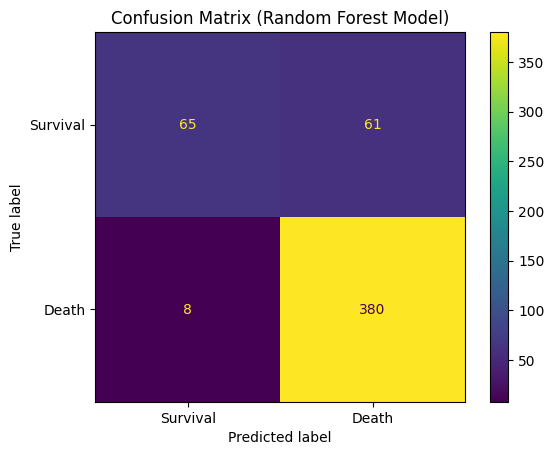

In [115]:
confuision_matrix = confusion_matrix(y_true=y_val, y_pred=best_models['RandomForestClassifier'].predict(X_val))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confuision_matrix, display_labels=['Survival', 'Death'])
cm_display.plot()
plt.title('Confusion Matrix (Random Forest Model)')
plt.show()

In [116]:
# save the model to disk
joblib.dump(best_models['RandomForestClassifier'], "rf_model.sav")

['rf_model.sav']

In [117]:
# execution_time = timeit.timeit(lambda: tune_models(X_train, y_train, param_grid), number=1)
# print(f"Execution time: {execution_time:.6f} seconds")

In [118]:
# execution_time = timeit.timeit(lambda: evaluate_models(X_test, y_test, best_models, metrics), number=1)
# print(f"Execution time: {execution_time:.6f} seconds")

<h1 style="color: #0000FF">Create an ensemble using VotingClassifier</h1>

<h4 style="color: #0000FF">Iterate Over Several Combinations and Evaluate the Performance</h4>

In [140]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model1 = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('LGBMClassifier', best_models['LGBMClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model1, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.81666667 0.85416667 0.85       0.84100418 0.87029289]
Mean Score: 0.8464260808926081


In [141]:
# Fit the ensemble model on the training data
ensembled_model1.fit(X_train, y_train)

# Make predictions on the test data
y_pred1 = ensembled_model1.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred1)
precision = precision_score(y_val, y_pred1)
recall = recall_score(y_val, y_pred1)
f1 = f1_score(y_val, y_pred1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.867704280155642
Precision: 0.865296803652968
Recall: 0.9768041237113402
F1 Score: 0.9176755447941888


In [144]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model2 = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('AdaBoostClassifier', best_models['AdaBoostClassifier']),
                                              ('SGDClassifier', best_models['SGDClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model2, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.8        0.84583333 0.86666667 0.85355649 0.85355649]
Mean Score: 0.8439225941422593


In [145]:
# Fit the ensemble model on the training data
ensembled_model2.fit(X_train, y_train)

# Make predictions on the test data
y_pred2 = ensembled_model2.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred2)
precision = precision_score(y_val, y_pred2)
recall = recall_score(y_val, y_pred2)
f1 = f1_score(y_val, y_pred2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8696498054474708
Precision: 0.8606741573033708
Recall: 0.9871134020618557
F1 Score: 0.9195678271308524


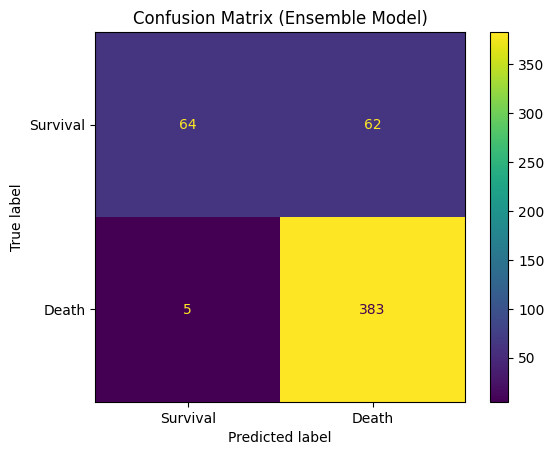

In [146]:
confuision_matrix = confusion_matrix(y_true=y_val, y_pred=y_pred2)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confuision_matrix, display_labels=['Survival', 'Death'])
cm_display.plot()
plt.title('Confusion Matrix (Ensemble Model)')
plt.show()

In [147]:
# save the model to disk
joblib.dump(ensembled_model2, "ensembled_model2.sav")

['ensembled_model2.sav']

In [123]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model3 = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('AdaBoostClassifier', best_models['AdaBoostClassifier']),
                                              ('SGDClassifier', best_models['SGDClassifier']),
                                              ('LGBMClassifier', best_models['LGBMClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model3, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.80833333 0.84166667 0.8625     0.84937238 0.84937238]
Mean Score: 0.8422489539748954


In [124]:
# Fit the ensemble model on the training data
ensembled_model3.fit(X_train, y_train)

# Make predictions on the test data
y_pred3 = ensembled_model3.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred3)
precision = precision_score(y_val, y_pred3)
recall = recall_score(y_val, y_pred3)
f1 = f1_score(y_val, y_pred3)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8599221789883269
Precision: 0.8708920187793427
Recall: 0.9561855670103093
F1 Score: 0.9115479115479116


In [125]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model4 = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('SGDClassifier', best_models['SGDClassifier']),
                                               ('LGBMClassifier', best_models['LGBMClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model4, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.81666667 0.84166667 0.87083333 0.84937238 0.86192469]
Mean Score: 0.8480927475592747


In [126]:
# Fit the ensemble model on the training data
ensembled_model4.fit(X_train, y_train)

# Make predictions on the test data
y_pred4 = ensembled_model4.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred4)
precision = precision_score(y_val, y_pred4)
recall = recall_score(y_val, y_pred4)
f1 = f1_score(y_val, y_pred4)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8599221789883269
Precision: 0.8590909090909091
Recall: 0.9742268041237113
F1 Score: 0.9130434782608696


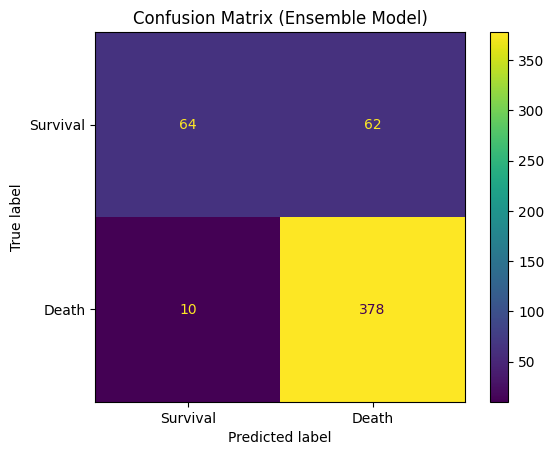

In [127]:
confuision_matrix = confusion_matrix(y_true=y_val, y_pred=y_pred4)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confuision_matrix, display_labels=['Survival', 'Death'])
cm_display.plot()
plt.title('Confusion Matrix (Ensemble Model)')
plt.show()

In [128]:
# save the model to disk
joblib.dump(ensembled_model4, "ensembled_model4.sav")

['ensembled_model4.sav']

In [129]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model5 = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('SGDClassifier', best_models['SGDClassifier']),
                                              ('LGBMClassifier', best_models['LGBMClassifier']),
                                              ('XGBClassifier', best_models['XGBClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model5, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.82083333 0.84583333 0.85       0.84518828 0.86610879]
Mean Score: 0.8455927475592746


In [130]:
# Fit the ensemble model on the training data
ensembled_model5.fit(X_train, y_train)

# Make predictions on the test data
y_pred5 = ensembled_model5.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred5)
precision = precision_score(y_val, y_pred5)
recall = recall_score(y_val, y_pred5)
f1 = f1_score(y_val, y_pred5)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8657587548638133
Precision: 0.8700696055684455
Recall: 0.9664948453608248
F1 Score: 0.9157509157509157


In [131]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model6 = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('LGBMClassifier', best_models['LGBMClassifier']),
                                              ('XGBClassifier', best_models['XGBClassifier']),
                                              ('DecisionTreeClassifier', best_models['DecisionTreeClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model6, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.81666667 0.85       0.85833333 0.83682008 0.86192469]
Mean Score: 0.8447489539748954


In [132]:
# Fit the ensemble model on the training data
ensembled_model6.fit(X_train, y_train)

# Make predictions on the test data
y_pred6 = ensembled_model6.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred6)
precision = precision_score(y_val, y_pred6)
recall = recall_score(y_val, y_pred6)
f1 = f1_score(y_val, y_pred6)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.867704280155642
Precision: 0.865296803652968
Recall: 0.9768041237113402
F1 Score: 0.9176755447941888


In [133]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model7 = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('LGBMClassifier', best_models['LGBMClassifier']),
                                              ('AdaBoostClassifier', best_models['AdaBoostClassifier']),
                                              ('XGBClassifier', best_models['XGBClassifier']),
                                              ('DecisionTreeClassifier', best_models['DecisionTreeClassifier']),
                                              ('BaggingClassifier', best_models['BaggingClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model7, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.81666667 0.85       0.8625     0.83682008 0.86610879]
Mean Score: 0.8464191073919107


In [134]:
# Fit the ensemble model on the training data
ensembled_model7.fit(X_train, y_train)

# Make predictions on the test data
y_pred7 = ensembled_model7.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred7)
precision = precision_score(y_val, y_pred7)
recall = recall_score(y_val, y_pred7)
f1 = f1_score(y_val, y_pred7)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8657587548638133
Precision: 0.8616780045351474
Recall: 0.979381443298969
F1 Score: 0.916767189384801


In [135]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model8 = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('LGBMClassifier', best_models['LGBMClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model8, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.81666667 0.85       0.85       0.84518828 0.87029289]
Mean Score: 0.8464295676429568


In [136]:
# Fit the ensemble model on the training data
ensembled_model8.fit(X_train, y_train)

# Make predictions on the test data
y_pred8 = ensembled_model8.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred8)
precision = precision_score(y_val, y_pred8)
recall = recall_score(y_val, y_pred8)
f1 = f1_score(y_val, y_pred8)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8696498054474708
Precision: 0.8672768878718535
Recall: 0.9768041237113402
F1 Score: 0.9187878787878788


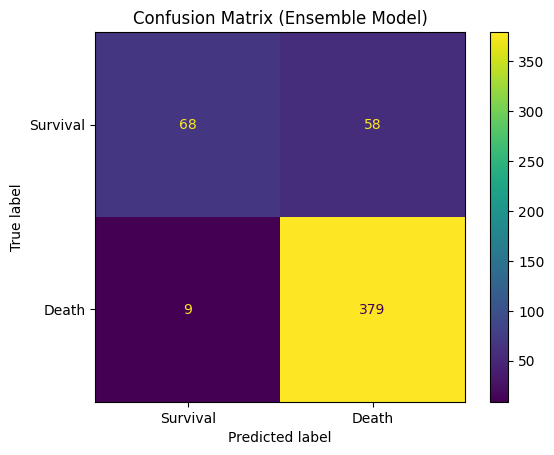

In [137]:
confuision_matrix = confusion_matrix(y_true=y_val, y_pred=y_pred8)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confuision_matrix, display_labels=['Survival', 'Death'])
cm_display.plot()
plt.title('Confusion Matrix (Ensemble Model)')
plt.show()

In [138]:
# save the model to disk
joblib.dump(ensembled_model8, "ensembled_model8.sav")

['ensembled_model8.sav']